<a href="https://colab.research.google.com/github/Wildan-Alrasyid/EVDA/blob/main/Project_Akhir_EVDA_Wildan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><strong><font color="blue">TUGAS AKHIR</font></strong></h2></center>
<center><h2><strong><font color="blue">Social Media Analytics (SMA)</font></strong></h2></center>
<center><h3><strong><font color="blue">Explorasi dan Visualisasi Data</a></font></strong></h3></center>

<img alt="" src="https://seeklogo.com/vector-logo/232715/universitas-indonesia"/>

<center><h3><strong><font color="blue">Wildan Alrasyid (2006614784)</a></font></strong></h3></center>
<center><h3><strong><font color="blue">S2 Matematika Fakultas MIPA</font></strong></h3></center>
<center><h3><strong><font color="blue">Universitas Indonesia </a></font></strong></h3></center>
<b><center><h3><strong><font color="blue">2022</h3></center>

In [7]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-11 05:54:12--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-11 05:54:12 (38.6 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

--2022-06-11 05:54:12--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221233 (21

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.4 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ As of spaCy v3.0, shortcuts like 'xx' are deprecated. Please use the
full pipeline package name 'xx_ent_wiki_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
Looking in indexes: https://pypi.org/simple, https:/

In [8]:
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
"Done"

'Done'

<h2 id="Aturan-twitter">Aturan, bentuk data, &amp; error codes twitter</h2>

<ol>
	<li>
	<p><a href="https://dev.twitter.com/rest/public/rate-limiting" target="_blank">https://</a><a href="https://dev.twitter.com/rest/public/rate-limiting" target="_blank">dev.twitter.com/rest/public/rate-limiting</a></p>
	</li>
	<li>
	<p><a href="https://dev.twitter.com/overview/terms/agreement-and-policy" target="_blank">https://dev.twitter.com/overview/terms/agreement-and-policy</a></p>
	</li>
	<li>
	<p><a href="https://dev.twitter.com/overview/api/response-codes" target="_blank">https://</a><a href="https://dev.twitter.com/overview/api/response-codes" target="_blank">dev.twitter.com/overview/api/response-codes</a></p>
	</li>
	<li>
	<p><a href="https://dev.twitter.com/overview/api/tweets" target="_blank">https://</a><a href="https://dev.twitter.com/overview/api/tweets" target="_blank">dev.twitter.com/overview/api/tweets</a></p>
	</li>
</ol>

In [9]:
# Contoh API Keys (Sesuaikan dengan API keys masing-masing)
Ck = 'gwnU0Dqk1CO7iADOhFSyHXi0g' # consumer_key
Cs = 'ItVSeph9j3Gtl4vgEFi1YZhPh1cxT8DbB6LBXDCf9QpRhbnrEY' # consumer_secret
At = '1535150243821780992-DZ2quyG0KKqn4t3DNV30SngxOfCfWI' # access_token
As = 'kD5dtmLAhqBm5uFsUEwOQPYih9ysIddAj6J30iRSc9GSO' # access_secret

'Done'

'Done'

In [10]:
import tweepy

auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "wildan alrasyid" you are now connected to twitter server


In [11]:
# Kita bisa post, delete, follow, like, reply, retweet, dsb.
# WARNING ... Status harus dibedakan, jika tidak akan gagal karena twitter mendeteksi status duplikat.

status = "Testing Digital Data Gathering - kuliah EDA-Viz"
t = api.update_status(status)
# Silahkan cek timeline setelah ini
"Done! ... Silahkan cek timeline twitter anda."

'Done! ... Silahkan cek timeline twitter anda.'

In [13]:
qry = 'pertamax'
N = 1000 # jumlah N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)
    
"Done"

1000it [00:19, 51.29it/s]


'Done'

In [14]:
T[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Jun 11 05:57:15 +0000 2022',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 588935259,
    'id_str': '588935259',
    'indices': [3, 15],
    'name': '💯 NKRI🇲🇨',
    'screen_name': 'Rena_mareta'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'RT @Rena_mareta: Menteri BUMN Erick Thohir menyentil orang kaya yg msh suka pakai pertalite, padahal harusnya Pertamax yg mereka beli, untk…',
 'geo': None,
 'id': 1535501396048498688,
 'id_str': '1535501396048498688',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'in',
 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 7,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coord

In [15]:
# T bukan sekedar list of tweets 
tweet = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweet)))

 Berhasil mendapatkan 1000 tweets


In [16]:
# Data pertama
tweet[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Jun 11 05:57:15 +0000 2022',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 588935259,
    'id_str': '588935259',
    'indices': [3, 15],
    'name': '💯 NKRI🇲🇨',
    'screen_name': 'Rena_mareta'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'RT @Rena_mareta: Menteri BUMN Erick Thohir menyentil orang kaya yg msh suka pakai pertalite, padahal harusnya Pertamax yg mereka beli, untk…',
 'geo': None,
 'id': 1535501396048498688,
 'id_str': '1535501396048498688',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'in',
 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 7,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coord

In [17]:
# Datanya berbentuk JSON
tweet[0]['created_at'], tweet[0]['full_text']

('Sat Jun 11 05:57:15 +0000 2022',
 'RT @Rena_mareta: Menteri BUMN Erick Thohir menyentil orang kaya yg msh suka pakai pertalite, padahal harusnya Pertamax yg mereka beli, untk…')

In [18]:
# Contoh mengakses data spesifik pada tweet yang pertama:
print('tweet pertama oleh "{}" : "{}"'.format(tweet[0]['user']['screen_name'],tweet[0]['full_text']))

tweet pertama oleh "ByruBima" : "RT @Rena_mareta: Menteri BUMN Erick Thohir menyentil orang kaya yg msh suka pakai pertalite, padahal harusnya Pertamax yg mereka beli, untk…"


# <center><font color="blue">Menyimpan hasil crawling (sederhana ke Text file berformat json)</font></center>

In [19]:
import json 
def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [20]:
# Menyimpan hasil crawling twitter
fileName = 'Tweets_2021.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)

Saved to Tweets_2021.json


# <center><font color="blue">Load Kembali?</font></center>

In [21]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [22]:
# Me-load kembali jika (misal) analisa ingin dilakukan di lain waktu
# Sengaja nama variabelnya saya bedakan (T2)
T2 = loadTweets(file=fileName)
print('tweet pertama oleh "{}" : "{}"'.format(T2[0]['user']['screen_name'],T2[0]['full_text']))

tweet pertama oleh "ByruBima" : "RT @Rena_mareta: Menteri BUMN Erick Thohir menyentil orang kaya yg msh suka pakai pertalite, padahal harusnya Pertamax yg mereka beli, untk…"


In [23]:
# Contoh mengambil hanya data tweet
D = [t['full_text'] for t in T2]
D[:5] # 5 tweet pertama

['RT @Rena_mareta: Menteri BUMN Erick Thohir menyentil orang kaya yg msh suka pakai pertalite, padahal harusnya Pertamax yg mereka beli, untk…',
 'RT @Rena_mareta: Menteri BUMN Erick Thohir menyentil orang kaya yg msh suka pakai pertalite, padahal harusnya Pertamax yg mereka beli, untk…',
 'RT @Rena_mareta: Menteri BUMN Erick Thohir menyentil orang kaya yg msh suka pakai pertalite, padahal harusnya Pertamax yg mereka beli, untk…',
 'Why pertamax sulit sekali 3 hari ini dibintaro… ngisi pertalite mulu gocap2 lama2 menjadi bukit. Eh btw Venom let there be Carnage ada di netplik. Jd isi pertalite aja dlu sementara.',
 'RT @Rena_mareta: Menteri BUMN Erick Thohir menyentil orang kaya yg msh suka pakai pertalite, padahal harusnya Pertamax yg mereka beli, untk…']

In [25]:
# Mari kita coba #1
topic = 'from:jokowi'
T = api.search(q=topic, lang='id', tweet_mode = 'extended')
tweet = [t._json for t in T]
isiTweet = [t['full_text'] for t in tweet]
isiTweet

['Sejumlah negara sedang mengalami kelangkaan pangan akibat ketidakpastian ekonomi global. Harga gas alam naik 153%, batu bara naik 133%, minyak naik 58%, dan minyak sawit mentah naik 207%. Harga gandum naik karena dua penghasil gandum dunia, Rusia dan Ukraina, sedang bermasalah.',
 'Perayaan 50 Tahun Himpunan Pengusaha Muda Indonesia digelar di Jakarta, hari ini. \n\nSaya mendorong para pengusaha muda ini agar terus beradaptasi dengan situasi ekonomi global yang tidak mudah, juga memanfaatkan berbagai peluang di dalamnya seperti di bidang pangan dan energi. https://t.co/Ub7q5GCfaq',
 'Sampai di akhir 2024, paling tidak 600 ribu ha lahan mangrove di Indonesia harus sudah terehabilitasi.\n\nUpaya pemerintah Indonesia dalam merehabilitasi hutan mangrove secara masif ini mendapat dukungan kerja sama dari berbagai pihak di dalam dan luar negeri.',
 'Pemerintah terus berupaya merehabilitasi dan membangun pusat mangrove dunia di beberapa provinsi sebagai salah satu komitmen Indonesia menghad

In [26]:
# https://www.latlong.net/convert-address-to-lat-long.html

alamat = "jl. Ir. H. Juanda No 95 tangerang selatan ciputat"
lat = '-6.307870'
lon = '106.755820'

"Done"

'Done'

In [28]:
# Mari kita coba #3 gunakan google (map) untuk koordinat suatu lokasi
# http://thoughtfaucet.com/search-twitter-by-location/
# misal search tweet tentang "makanan" di Depok dan sekitarnya
radius = '100km'
Geo = ','.join([lat, lon, radius])
qry = 'beli mobil'
for tweet_ in tweepy.Cursor(api.search, q=qry, geocode=Geo).items(N):
    print([tweet_.created_at, tweet_.text.encode('utf-8'), tweet_.user.id, tweet_.geo])

[datetime.datetime(2022, 6, 11, 4, 55, 20), b'mau cuci mobil, trus sekalian mau beli keperluan yg udh habis https://t.co/zhvxzavlvR', 1374414481753731078, None]
[datetime.datetime(2022, 6, 11, 4, 16, 49), b'Info buat anda pengendara mobil atau motor, setelah beli BBM Pertamina di SPBU ini bisa lanjut berendam di air pana\xe2\x80\xa6 https://t.co/Pr0imLTlxT', 135795460, None]
[datetime.datetime(2022, 6, 11, 3, 41, 55), b'@rizqash @khoerunisz Udah disiapin parkiran gak fir buat pajeronya khoer? Jangan sampe udah beli mobil tapi gak punya parkiran', 540476743, None]
[datetime.datetime(2022, 6, 11, 3, 19, 31), b'pen beli mobil woi', 1250782422754398208, None]
[datetime.datetime(2022, 6, 11, 2, 40, 20), b'"Ngapain beli motor, jalan jalan ko pake motor, sering ujan mending bawa mobil noh" inggih buk\xf0\x9f\x98\x94', 230115926, None]
[datetime.datetime(2022, 6, 11, 2, 22, 31), b'@HappyCandyJoy @mantaisantaiii @Taufanafid @kegblgnunfaedh plot twist ternyata tetangganya beli mobil buat nge gra

In [29]:
# Streaming tweets. Untuk percobaan pilih topicS sesuatu yg sedang trending/populer "saat ini".
# Atau bisa coba dengan mengirim tweet sendiri :)
from twython import TwythonStreamer

def streamTwitter(topicS, lang):
    class MyStreamer(TwythonStreamer):
        def on_success(self, data):
            global count
            count+=1
            print('tweet from {}, post: {}'.format(data['user']['screen_name'], data['text']))
            if count==maxTweet:
                print('\nFinished streaming %.0f tweets' %(maxTweet)); self.disconnect()
        def on_error(self, status_code, data):
            print('Error Status = %s' %status_code); self.disconnect()

    while count<maxTweet:
        stream = MyStreamer(Ck, Cs, At, As)
        stream.statuses.filter(track=topicS)

In [32]:
maxTweet, count = 12, 0 # Rubah sesuai dengan kebutuhan, Untuk percobaan ini cukup (misal) 12 tweet
lan = set(['en','id']) # bahasa bisa dipilih > 1
topicS = ['taudata', 'ui'] # Bisa>1

streamTwitter(topicS, lan)

TypeError: ignored

Preprocessing data

In [33]:
# preprocess "D": kumpulan tweet
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')
stopId, _ = tau.LoadStopWords(lang='id')
stopId.add("rt")

list(stopId)[:5]

['seharusnya', 'selaku', 'atau', 'disebutkan', 'para']

In [34]:
from tqdm import tqdm 

cleanD = []
for t in tqdm(D):
    doc = tau.cleanText(t, fix=slangFixId, lan='id', stops = stopId)
    cleanD.append(doc)
    
"Done"

100%|██████████| 1000/1000 [00:00<00:00, 1768.36it/s]


'Done'

In [35]:
print(D[0], end='\n\n')
print(cleanD[0], end='\n\n')

RT @Rena_mareta: Menteri BUMN Erick Thohir menyentil orang kaya yg msh suka pakai pertalite, padahal harusnya Pertamax yg mereka beli, untk…

rena_mareta menteri bumn erick thohir menyentil orang kaya suka pakai pertalite beli untk



In [36]:
# Save ke txt ... lalu nanti akan di upload ke Voyant Tools
filename = 'tweets_2021.txt'
with open(filename, 'w') as f:
    for T in cleanD:
        f.write(T+'\n')
        
"Tweets Saved!"

'Tweets Saved!'

# <center><font color="blue">HashTag Analysis</font></center>

* Frequency-Based
* Bisa ditambahkan analisa hashtags analysis ini dari waktu ke waktu

In [37]:
import re

HTfilters = set(['zz', 'architec', 'prize', 'stirli', 'architect', 'london', 'cpd', 'design', 'stirling', 'photogr', 'gemini', 
                 'mule', 'karaoke', 'playing', 'official', 'berita', 'follow', 'retweet', 'mufc', 'ntms', 'infolimit', 'eeaa', 
                 'eaa', 'cfc', 'caprico', 'breaking','news', 'libra', 'mereka', 'brankas', 'psikolog', 'aquarius', 'klc'])
# modifikasi HTfilters sesuai data kamu
HT = {'hashtags':[]}
count = 0
getHashTags = re.compile(r"#(\w+)")
for i, d in tqdm(enumerate(D)):
    hashtags = re.findall(getHashTags, d)
    if hashtags:
        TG = []
        for tag in hashtags:
            dTag = str(tag).strip().lower()
            if len(dTag)>2:
                add = True
                for f in HTfilters:
                    if f in dTag:
                        add=False; break
                if add:
                    TG.append('#'+dTag); count += 1
            HT['hashtags'].append(TG)
print('Found {} number of hashtags'.format(count))

1000it [00:00, 184852.53it/s]

Found 56 number of hashtags


100%|██████████| 56/56 [00:00<00:00, 284359.59it/s]


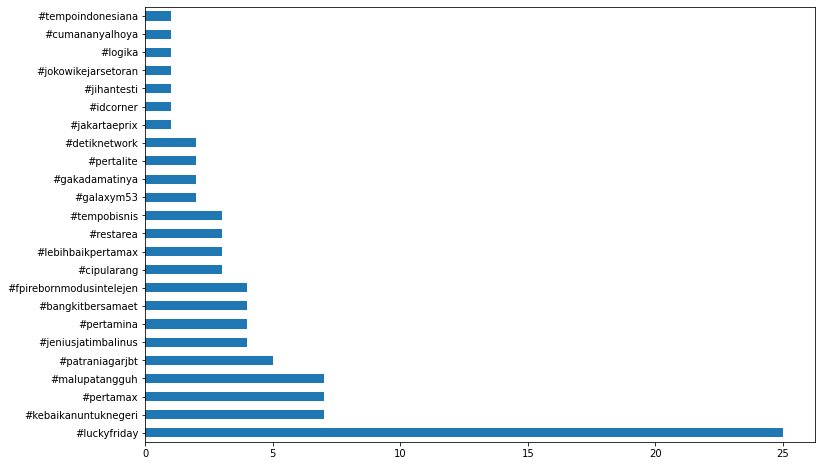

In [38]:
import pandas as pd

N = 50 # Number of top frequent hashtags to be plotted

dtHT = [x for t in tqdm(HT['hashtags']) for x in t] # any(h not in x for h in HTfilters)
dtHT = pd.Series(dtHT)
dtHT = dtHT.value_counts()
dtHT = dtHT.sort_index()
dtHT = dtHT.sort_values(ascending = False) 
dtHT.to_csv('hashTags_2021.csv', encoding='utf8')
dtHT = dtHT.iloc[:N]

p = dtHT.plot(kind='barh', figsize=(12,8), legend = False)

# Web Scrapping?

In [39]:
import urllib.request
from bs4 import BeautifulSoup as bs

URL = 'https://www.beritasatu.com/beritasatu-tv'
Doc = urllib.request.urlopen(URL).read()
Doc = bs(Doc,'lxml').text
print(Doc)






































































Indeks Berita Oleh BeritaSatu TV Terbaru dan Terkini  - BeritaSatu.com









BeritaSatu.com   |   BeritaSatuTV   |   Investor.id   |  
          Jakartaglobe.id   |   e-Paper   |  
          























CARI






REGISTER
LOGIN







HOME
NEWS
EKONOMI
BOLA
SPORT
OTOMOTIF
LIFESTYLE
OPINI
FOKUS

Y20 INDONESIA










HEADLINE




Final NBA Berlangsung Ketat, Warriors Imbangi Celtics 2-2|KY Rekomendasikan Pecat 2 Hakim PN Rangkasbitung yang Nyabu|AKBP Brotoseno Masih Berdinas, IPW: Publik Tak Percaya Polri

















"Indeks Berita Oleh BeritaSatu TV"



Share to Facebook




Share to Twitter




Share to WhatsApp




Share to Email





 




 








 
NEWSLETTER
Dapatkan informasi terbaru dari kami



SUBSCRIBE


                    Email yang Anda masukkan tidak valid.
                  






BERITA TERPOPULER

+ SELENGKAPNYA










1


Anthony Sinisuka Ginting Pulangkan Juara All Englan

# Loading Local Documents

1. Instalasi Java
 - JDK 8 ... ingat harus JDK 8
 - https://www.oracle.com/id/java/technologies/javase/javase-jdk8-downloads.html
 - Set Java Home Directory
2. Instalasi Tika Server :
 - Download Tika App Executable Java Jar: https://archive.apache.org/dist/tika/tika-app-1.24.1.jar
 - Put in Python home directory
3. Instalasi Module Python Tika
4. Reading pdf Files (Python Code below)

### Tika can read Pdf, DocX, PPTX, etc.

In [40]:
from tika import parser#, unpack

def readDocs(file):
    if 'pdf' in file:
        headers = {'X-Tika-PDFextractInlineImages': 'true',} 
        raw = parser.from_file(file, headers=headers)
    else:
        raw = parser.from_file(file)
    if 'content' in raw.keys():
        return raw['content']
    else:
        return None

In [41]:
try:
    doc = readDocs('data/contoh.pdf')
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    doc = readDocs('data/contoh.pdf')
    
print(doc)

2022-06-11 06:14:04,882 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2022-06-11 06:14:06,172 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2022-06-11 06:14:06,647 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2022-06-11 06:14:11,655 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


















































BUTIR-BUTIR PEDOMAN PENGHAYATAN DAN PENGAMALAN PANCASILA 
 
   
Lima asas dalam Pancasila dijabarkan menjadi 36 butir pengamalan, sebagai pedoman praktis bagi 
pelaksanaan Pancasila. 
 
Butir-butir Pancasila ditetapkan dalam Ketetapan MPR No. II/MPR/1978 tentang Ekaprasetia 
Pancakarsa. 
 
I. SILA PERTAMA : KETUHANAN YANG MAHA ESA 

1. Percaya dan Takwa kepada Tuhan Yang Maha Esa sesuai dengan agama dan kepercayaan 
masing-masing menurut dasar kemanusiaan yang adil dan beradab. 

2. Hormat menghormati dan bekerjasama antar pemeluk agama & penganut-penganut 
kepercayaan yang berbeda-beda sehingga terbina kerukunan hidup. 

3. Saling hormat-menghormati kebebasan menjalankan ibadah sesuai dengan agama dan 
kepercayaannya. 

4. Tidak memaksakan suatu agama dan kepercayaan kepada orang lain. 
 
II. SILA KEDUA : KEMANUSIAAN YANG ADIL DAN BERADAB 

1. Mengakui persamaan derajat, persamaan hak dan persamaan kewajiban antara sesama 
manusia. 

2 S

# <center><font color="blue"> Terimakasih</font></center>

<hr />
